In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'tensorflow'

In [3]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=25

In [4]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    'tomato',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

NameError: name 'tf' is not defined

In [5]:
class_names=dataset.class_names
class_names

NameError: name 'dataset' is not defined

In [5]:
len(dataset)

501

In [6]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[7 2 1 8 6 1 9 0 2 7 9 5 2 6 9 9 4 1 7 0 7 0 0 1 4 3 0 9 5 4 4 6]


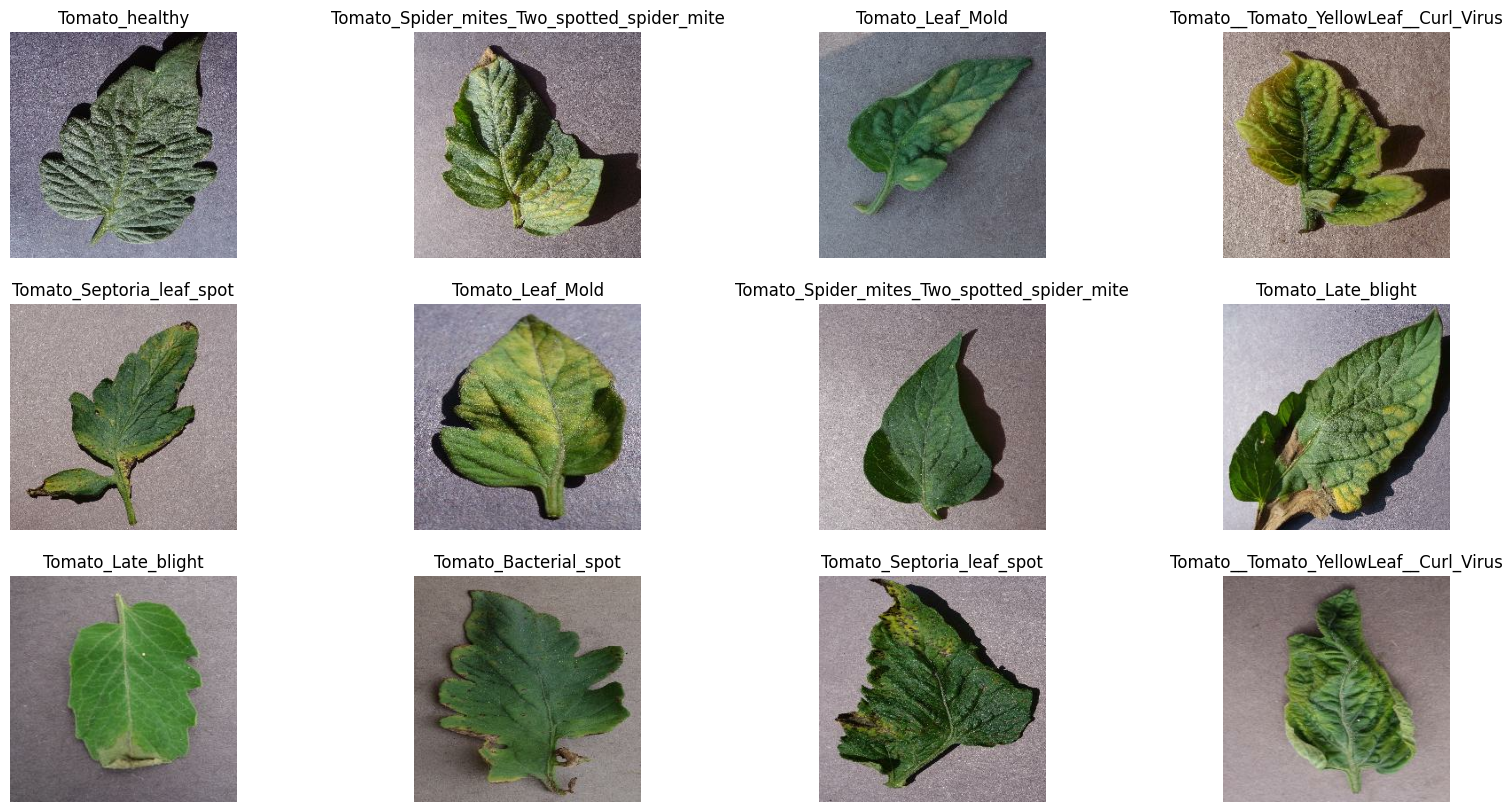

In [ ]:
plt.figure(figsize=(20,10))

for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.title(class_names[label_batch[i]])
        plt.axis('off')
        plt.imshow(image_batch[i].numpy().astype('uint8'))

In [8]:
len(dataset)

501

In [9]:
train_size=0.8
len(dataset)*train_size

400.8

In [10]:
train_ds=dataset.take(400)
len(train_ds)

400

In [11]:
test_ds=dataset.skip(400)
len(test_ds)

101

In [12]:
val_size=0.1
len(dataset)*val_size

50.1

In [13]:
val_ds=test_ds.take(50)
len(val_ds)

50

In [14]:
test_ds=test_ds.skip(6)
len(test_ds)

95

In [15]:
import tensorflow as tf

def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):

    assert( train_split + test_split + val_split )==1
    
    ds_size = len(ds)  # Get the total size of the dataset
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=1)  # Shuffle the dataset if needed
    
    train_size = int(train_split * ds_size)  # Calculate the size of the training set
    val_size = int(val_split * ds_size)      # Calculate the size of the validation set
    
    train_ds = ds.take(train_size)  # Create the training dataset
    
    val_ds = ds.skip(train_size).take(val_size)  # Create the validation dataset
    test_ds = ds.skip(train_size + val_size)     # Create the test dataset
    
    return train_ds, val_ds, test_ds  # Return the datasets


In [16]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

400

In [18]:
len(val_ds)

50

In [19]:
len(test_ds)

51

In [20]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255),
])

In [22]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [23]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [24]:

input_shape = ( IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

model = models.Sequential([
    layers.Input(shape=input_shape),
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,202 (719.54 KB)

 Trainable params: 184,202 (719.54 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [27]:
print(type(model))

<class 'keras.src.models.sequential.Sequential'>


In [28]:
early_stopping = EarlyStopping(
    monitor='accuracy',  # Monitor model accuracy
    patience=5,          # Number of epochs to wait for improvement
    restore_best_weights=True ) # Restores the weights of the best epoch

In [29]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds,
    callbacks=[early_stopping]
)

Epoch 1/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 723s 2s/step - accuracy: 0.2902 - loss: 1.9537 - val_accuracy: 0.3913 - val_loss: 2.1768
Epoch 2/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 710s 2s/step - accuracy: 0.5061 - loss: 1.3839 - val_accuracy: 0.4938 - val_loss: 1.4869
Epoch 3/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 472s 1s/step - accuracy: 0.6681 - loss: 0.9312 - val_accuracy: 0.5775 - val_loss: 1.3417
Epoch 4/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 456s 1s/step - accuracy: 0.7552 - loss: 0.6797 - val_accuracy: 0.7369 - val_loss: 0.8103
Epoch 5/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 459s 1s/step - accuracy: 0.8003 - loss: 0.5670 - val_accuracy: 0.7669 - val_loss: 0.7060
Epoch 6/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 469s 1s/step - accuracy: 0.8311 - loss: 0.4836 - val_accuracy: 0.8106 - val_loss: 0.5433
Epoch 7/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 468s 1s/step - accuracy: 0.8432 - loss: 0.4418 - val_accuracy: 0.7044 - val_loss: 1.0479
Epoch 8/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 469s 1s/step - accuracy: 0.8685 - loss: 0.3748 - val_accu

In [30]:
scores = model.evaluate(test_ds)

51/51 ━━━━━━━━━━━━━━━━━━━━ 151s 435ms/step - accuracy: 0.8384 - loss: 0.5263


In [31]:
scores

[0.5288487076759338, 0.8351715803146362]

In [32]:
history

In [33]:
history.params

{'verbose': 1, 'epochs': 25, 'steps': 400}

In [34]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [35]:
history.history['loss'][:5] # show loss for first 5 epochs


[1.804890751838684,
 1.2597707509994507,
 0.8616750836372375,
 0.6484076976776123,
 0.5449713468551636]

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

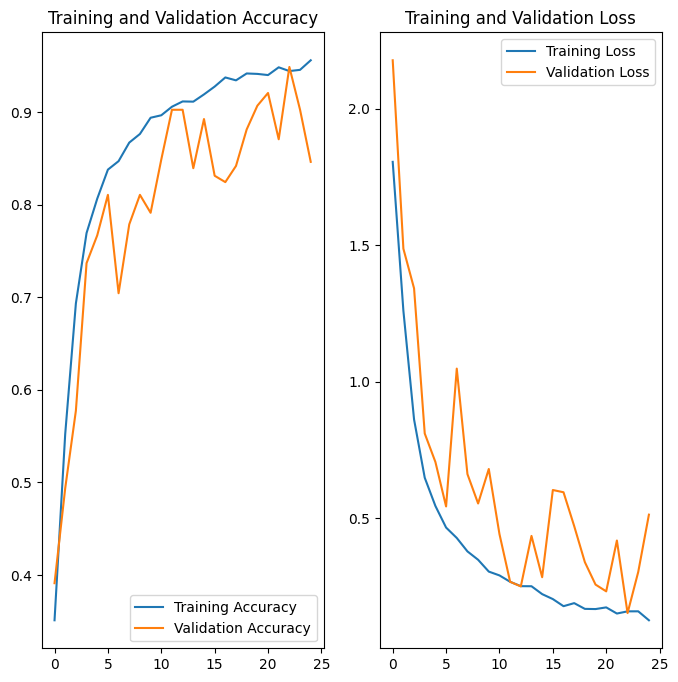

In [37]:

# Plotting the training and validation accuracy and loss
plt.figure(figsize=(8, 8))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


First images to predict
Actual Label Tomato_healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Label Tomato_Spider_mites_Two_spotted_spider_mite


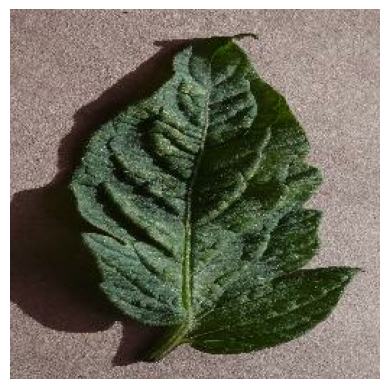

In [38]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image=(images_batch[0].numpy().astype('uint8'))
    first_label=label_batch[0]

print('First images to predict')
plt.axis('off')
plt.imshow(first_image)
print("Actual Label",class_names[first_label])

batch_prediction=model.predict(images_batch)
print('Predicted Label',class_names[np.argmax(batch_prediction[0])])

In [39]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


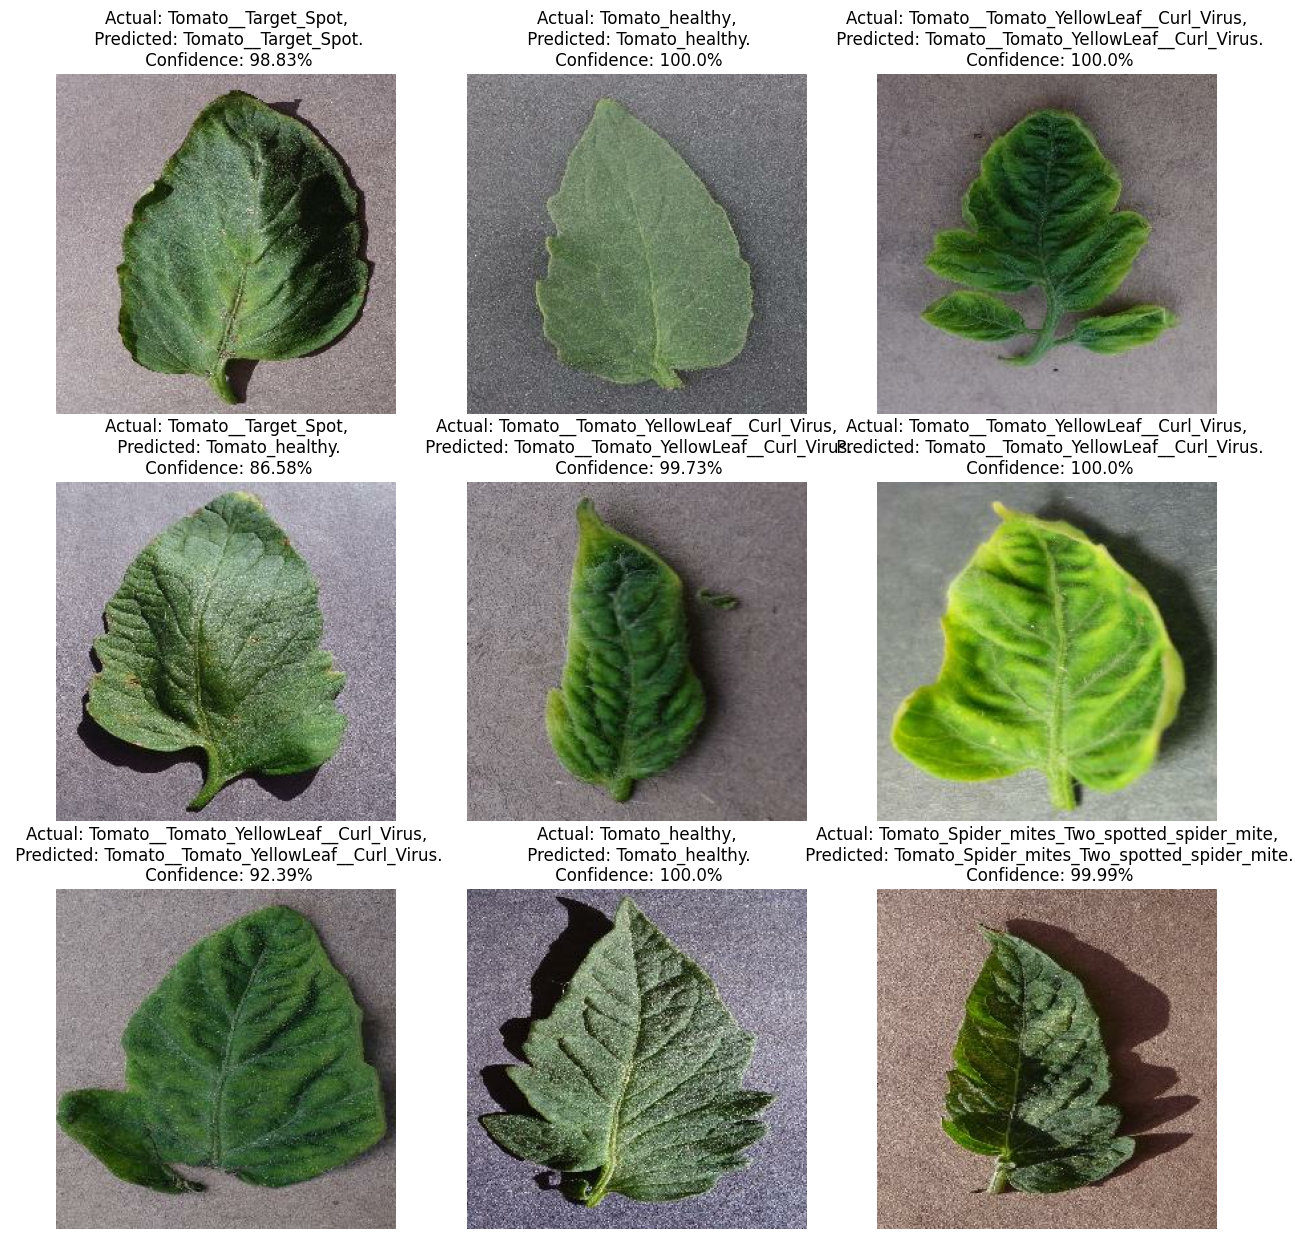

In [40]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
import os
import tensorflow as tf

base_dir = "../saved_models"
model_version = max([int(f.split('.')[0]) for f in os.listdir(base_dir) if f.split('.')[0].isdigit()] + [0]) + 1
keras_model_path=model.save(os.path.join(base_dir, f"{model_version}.keras"))
